# 红酒品质预测


## 1. 项目背景介绍

红酒（Red wine）是葡萄、蓝莓等水果经过传统及科学方法相结合进行发酵的果酒。红酒比较典型的是葡萄红酒和蓝莓红酒，葡萄酒有许多分类方式。以成品颜色来说，可分为红葡萄酒、白葡萄酒及粉红葡萄酒三类。葡萄酒在大约公元前1000年到前500年之间在法国南部出现，而后它开始在地中海盆地的大部分地区进行繁衍传播。早期，这种饮料一直被视认是一种只有贵族才能享用的高尚饮品，也是一种用来敬拜酒神巴克斯（Bacchus）的祭神用品。

鉴于红酒深受消费者喜爱，本项目将利用机器学习工具和算法对红酒成分和质量进行探索。我们采用的数据集是采集于葡萄牙北部“Vinho Verde”葡萄酒🍷的数据。由于隐私和物流问题，只有理化变量特征是可以进行使用的（例如，数据集中没有关于葡萄品种、葡萄酒品牌、葡萄酒销售价格等的数据）。

- 文件列表

  该数据集包含2个文件

  - winequality-red.csv：红葡萄酒质量数据
  - winequality-white.csv：白葡萄酒质量数据

下面以红葡萄酒质量数据为例说明：

- 数据集的整体特征

| 数据集名称   | 数据类型 | 特征数 | 实例数 | 值缺失 | 相关任务   |
| :----------- | :------- | :----- | :----- | :----- | :--------- |
| 红葡萄酒质量 | 数值数据 | 12     | 1599   | 无     | 分类、回归 |

- 属性描述
  **文件winequality-red.csv包含12个字段，具体信息如下：**
  每一行代表的是一种红葡萄酒

| No   | 属性                             | 数据类型 | 字段描述               |
| :--- | :------------------------------- | :------- | :--------------------- |
| 1    | fixed acidity                    | Numeric  | 非挥发性酸             |
| 2    | volatile acidity                 | Numeric  | 挥发性酸               |
| 3    | citric acid                      | Numeric  | 柠檬酸                 |
| 4    | residual sugar                   | Numeric  | 残糖                   |
| 5    | chlorides                        | Numeric  | 氯化物                 |
| 6    | free sulfur dioxide              | Numeric  | 游离二氧化硫           |
| 7    | total sulfur dioxide             | Numeric  | 总二氧化硫             |
| 8    | density                          | Numeric  | 密度                   |
| 9    | pH                               | Numeric  | 酸碱度                 |
| 10   | sulphates                        | Numeric  | 硫酸盐                 |
| 11   | alcohol                          | Numeric  | 酒精                   |
| 12   | quality (score between 0 and 10) | Numeric  | 葡萄酒质量（1-10之间） |

在这个项目中，我们将探索以下任务：

- 好的葡萄酒有什么特征？

- 哪些特征是无论好的坏的葡萄酒都具有的？

- 如何通过已知特征来预测葡萄酒的品质？

在这个项目中，我们将使用数据可视化，线性模型，knn模型去尝试解答这些问题


## 2. 数据清洗和探索

- 导入相关库  

**numpy** 提供了许多高级的数值编程工具，如：矩阵数据类型、矢量处理，以及精密的运算库。专为进行严格的数字处理而产生。  
**pandas** 是基于Numpy的一种工具，该工具是为解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。

In [1]:
import pandas as pd
import numpy as np


- 读取数据并显示前5个样本信息   
让我们先来看看数据样本长啥样？

In [2]:
wine = pd.read_csv("./winequality-red.csv")

# 展示前5个红葡萄酒样本
wine.head()


fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

可以发现，原始数据集是比较乱的，因此我们需要对数据集进行预处理

- 数据预处理

In [3]:
# 对特征重新命名
feature_names = ['fixed_acid', 'volatile_acid', 'citric_acid', 'residual_suger', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
               'density', 'ph', 'sulphates','alcohol', 'quality']

# 对特征值进行分割
new_rank = wine[wine.columns[0]].str.split(";", expand = True)

# 删除原始比较乱的特征列
wine = wine.drop(columns = wine.columns)

# 添加处理好的特征数据
for i in range(len(feature_names)):
    wine[feature_names[i]] = new_rank[:][i]
    wine = wine.astype({feature_names[i]:"float"})
wine.head()


fixed_acid  volatile_acid  citric_acid  residual_suger  chlorides  \
0         7.4           0.70         0.00             1.9      0.076   
1         7.8           0.88         0.00             2.6      0.098   
2         7.8           0.76         0.04             2.3      0.092   
3        11.2           0.28         0.56             1.9      0.075   
4         7.4           0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [4]:
wine.dtypes


fixed_acid              float64
volatile_acid           float64
citric_acid             float64
residual_suger          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

- 将特征名称替换为中文

In [5]:
# 复制一份数据集
cn_wine = wine.copy(deep=True)
# 将特征名称替换为中文
cn_wine.columns = ['非挥发性酸', '挥发性酸', '柠檬酸', '残糖', '氯化物', '游离二氧化硫', '总二氧化硫', '密度', '酸碱度', '硫酸盐', '酒精','葡萄酒质量']
# 展示前五个样本
cn_wine.head()


非挥发性酸  挥发性酸   柠檬酸   残糖    氯化物  游离二氧化硫  总二氧化硫      密度   酸碱度   硫酸盐   酒精  \
0    7.4  0.70  0.00  1.9  0.076    11.0   34.0  0.9978  3.51  0.56  9.4   
1    7.8  0.88  0.00  2.6  0.098    25.0   67.0  0.9968  3.20  0.68  9.8   
2    7.8  0.76  0.04  2.3  0.092    15.0   54.0  0.9970  3.26  0.65  9.8   
3   11.2  0.28  0.56  1.9  0.075    17.0   60.0  0.9980  3.16  0.58  9.8   
4    7.4  0.70  0.00  1.9  0.076    11.0   34.0  0.9978  3.51  0.56  9.4   

   葡萄酒质量  
0    5.0  
1    5.0  
2    5.0  
3    6.0  
4    5.0

- 查看是否丢失数据

In [6]:
np.sum(cn_wine.isnull())


非挥发性酸     0
挥发性酸      0
柠檬酸       0
残糖        0
氯化物       0
游离二氧化硫    0
总二氧化硫     0
密度        0
酸碱度       0
硫酸盐       0
酒精        0
葡萄酒质量     0
dtype: int64

可以发现数据特征值比较完整，没有丢失数据。

- 简单处理和看一下各个变量的范围、大小、波动趋势等

统计结果包括：计数，平均值，标准差，最小值，百分位数为0.25/0.5,0.75时的值和最大值

In [7]:
cn_wine.describe()


非挥发性酸         挥发性酸          柠檬酸           残糖          氯化物  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

            游离二氧化硫        总二氧化硫           密度          酸碱度          硫酸盐  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean     15.874922    46.467792     0.996747     3.311113     0.658149   
std      10.460157    32.895324     0.001887     0.154386     0.169507   
min       1.000000     6.000000     0.990070     2.740000     0.330000   
25%       7.000000    22.000000     0.995600     3.210000     0.550000   
50%      14.000000    38.000000     0.996750     3.310000     0.620000   
75%      21.000000    62.000000     0.997835     3.400000     0.730000   
max      72.000000   289.000000     1.003690     4.010000     2.000000   

                酒精        葡萄酒质量  
count  1599.000000  1599.000000  
mean     10.422983     5.636023  
std       1.065668     0.807569  
min       8.400000     3.000000  
25%       9.500000     5.000000  
50%      10.200000     6.000000  
75%      11.100000     6.000000  
max      14.900000     8.000000


## 3. 数据可视化分析

- 了解一下变量与变量之间的线性关系

heatmap热力图是一款非常热门的图形，通过颜色来反映数据之间的关系

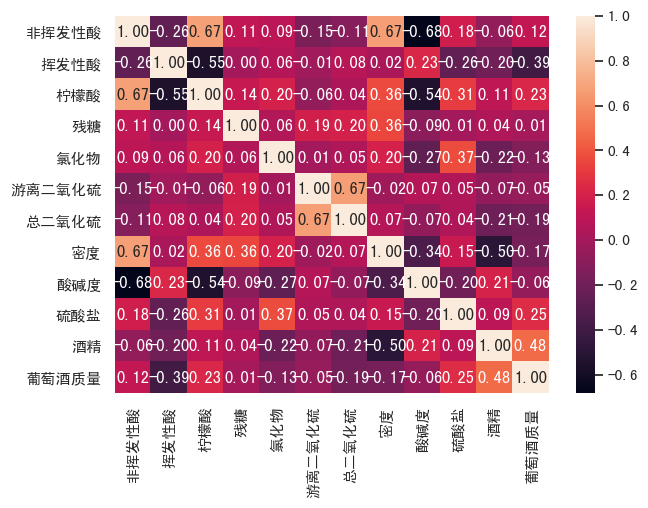

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
plt.figure(dpi=100, figsize=(7, 5))# 设置图片大小
sns.heatmap(cn_wine.corr(), annot=True, fmt='.2f')


从中可以看出：因为方块颜色越浅则代表正相关性越大，颜色越深则表示负相关性越大，所以有些自变量之间有很大的相关性，比如游离二氧化硫和游离二氧化硫，大多数变量与葡萄酒质量的相关性并不明显，但酒精含量与葡萄酒质量有相对比较大的正相关性，与挥发性酸有比较明显的负相关性.

pair组合关系图是描述数据变量两两之间的关系图.

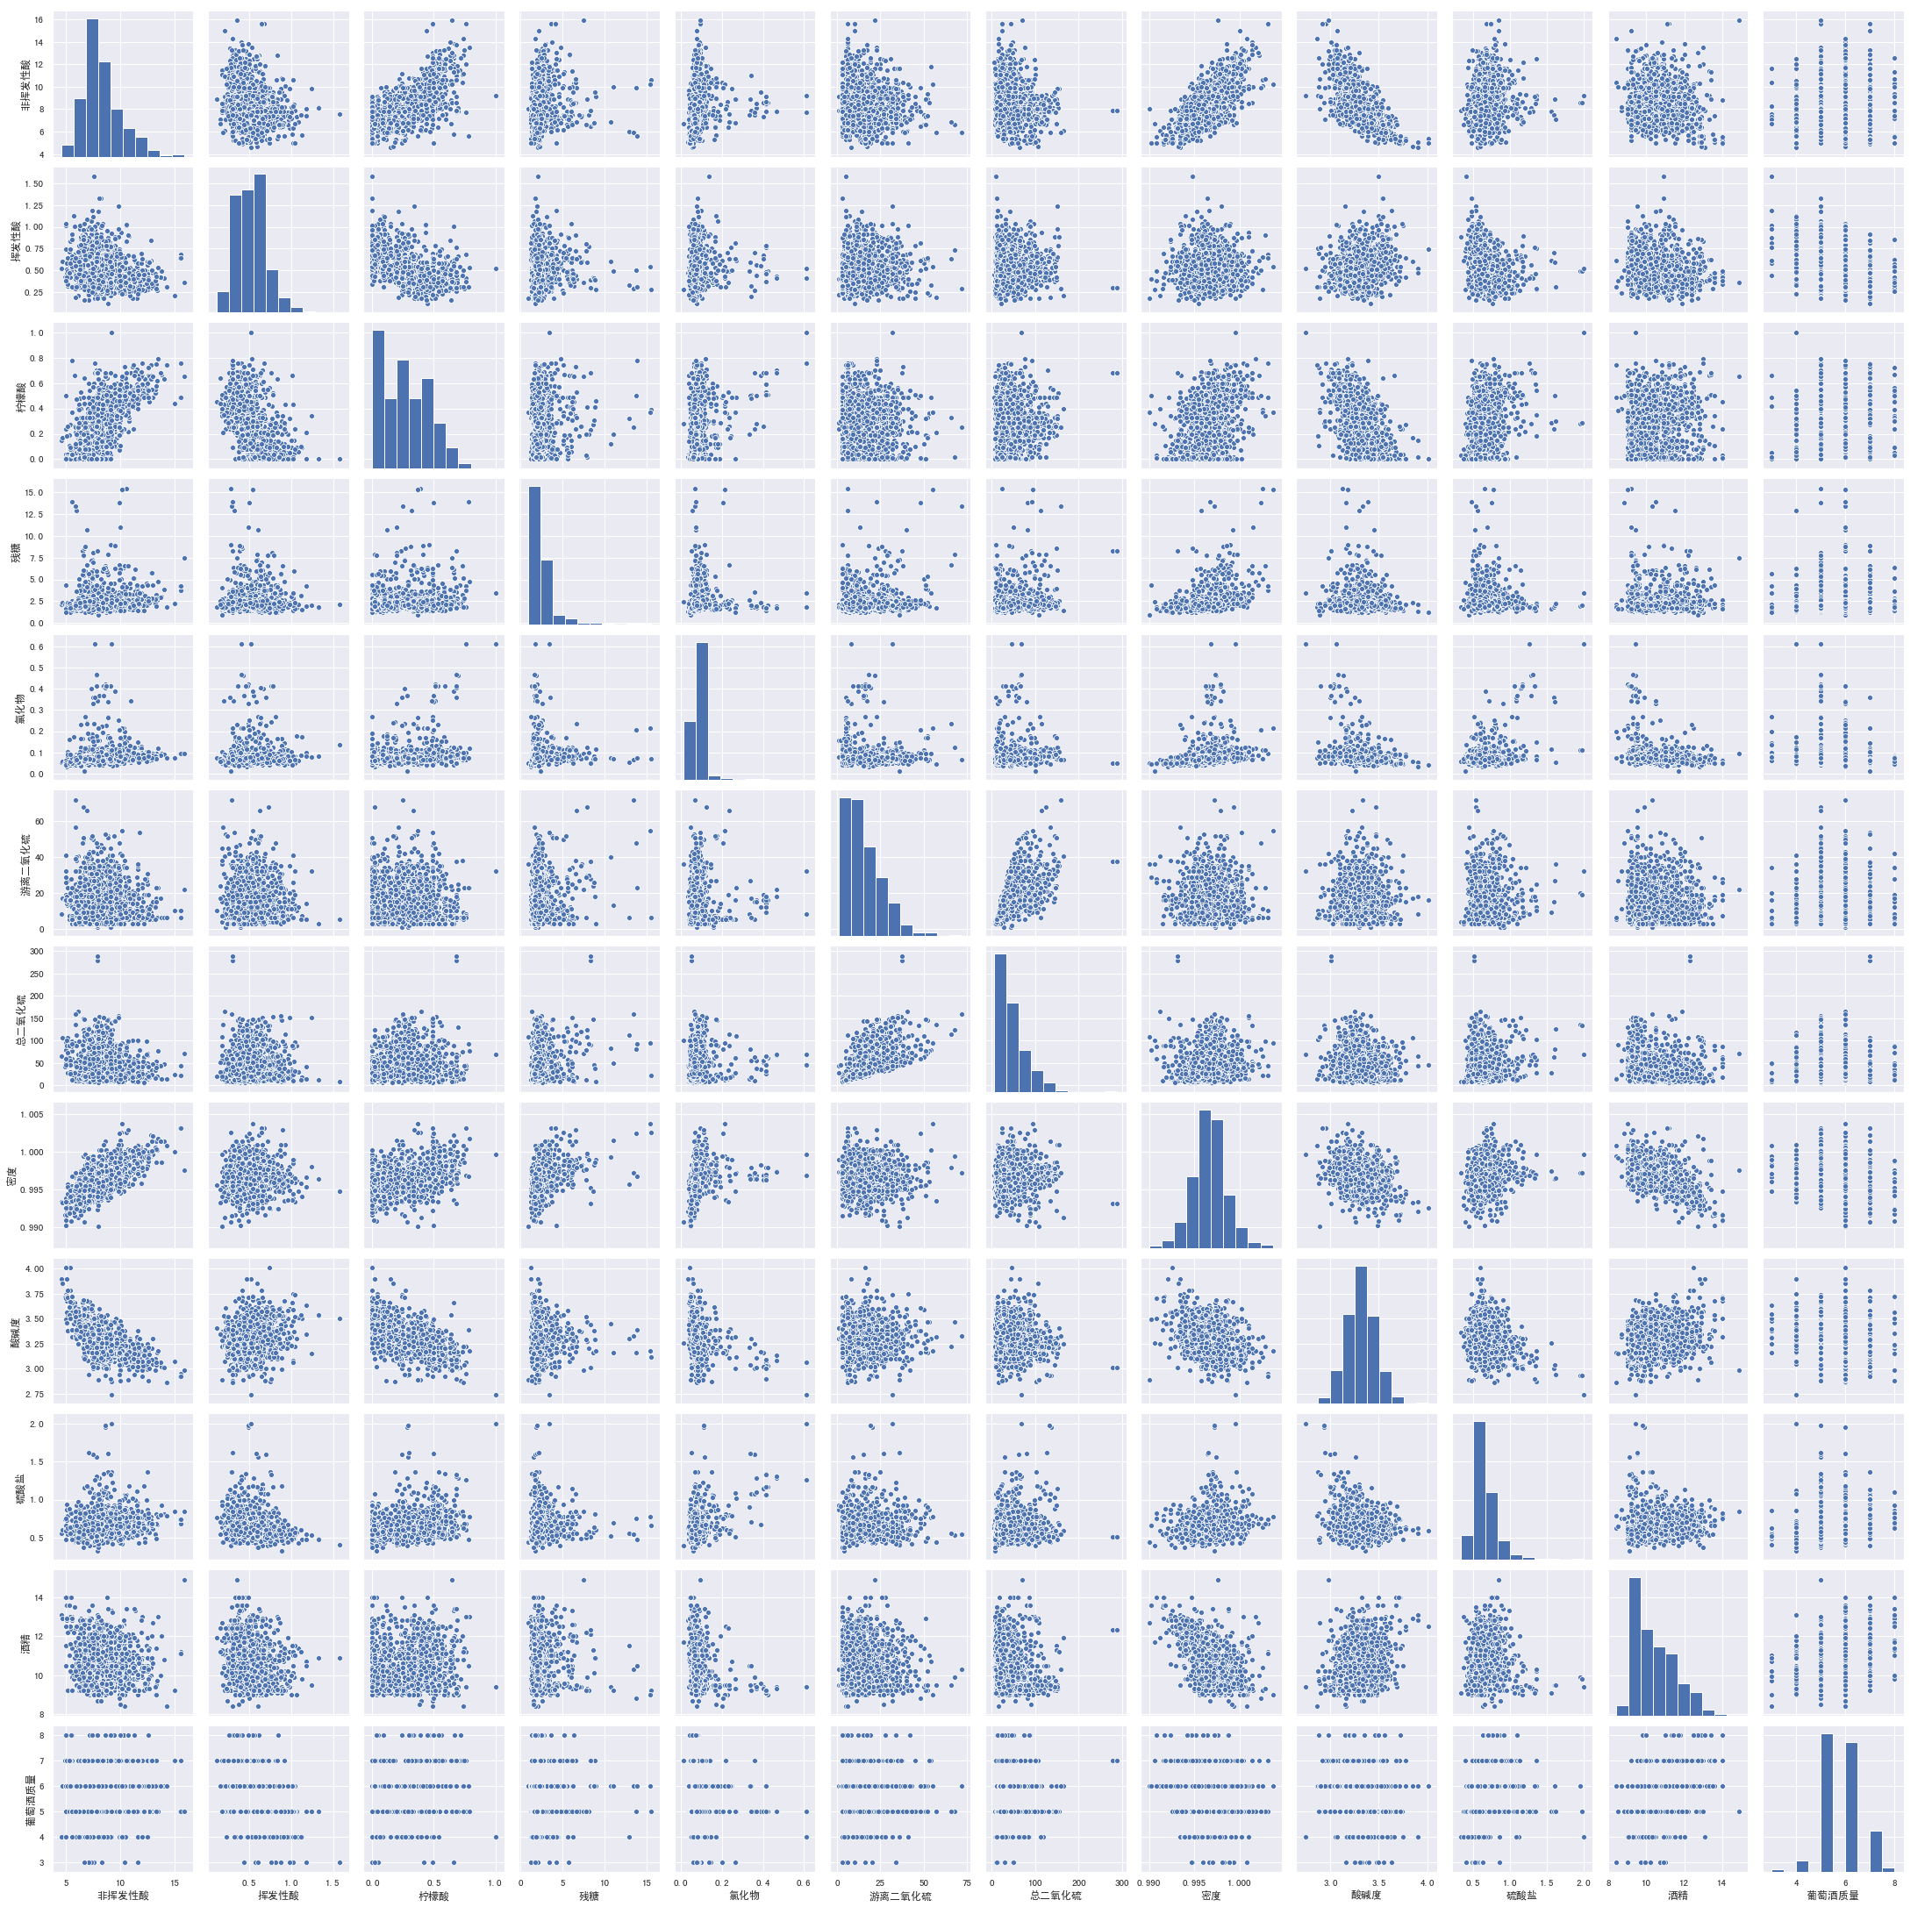

In [9]:
sns.pairplot(cn_wine)


从结果可以看出，特征变量之间的相关性与heatmap图的分析结论基本一致.

- 了解不同变量的分布

小提琴图 (Violin plot)是用来展示多组数据的分布状态以及概率密度。

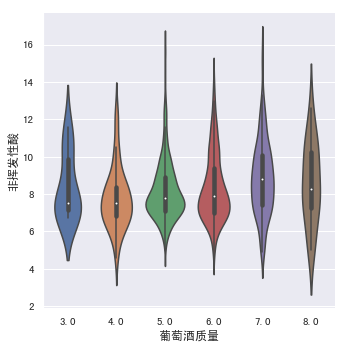

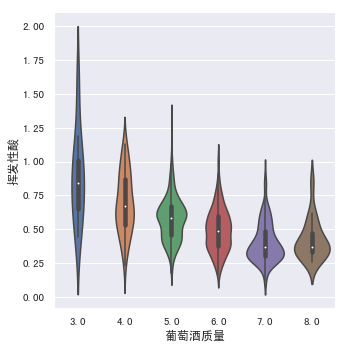

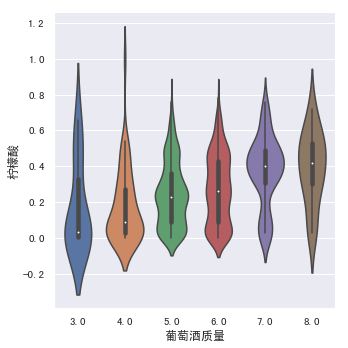

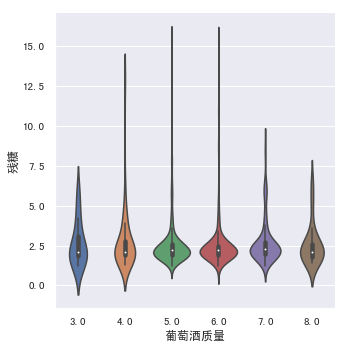

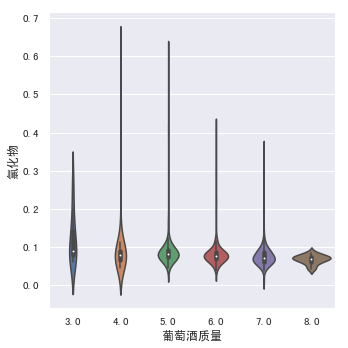

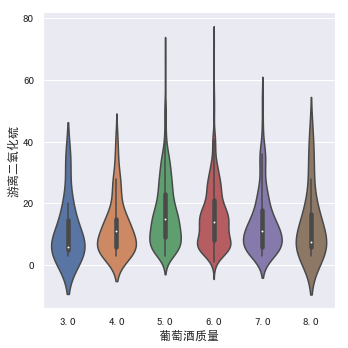

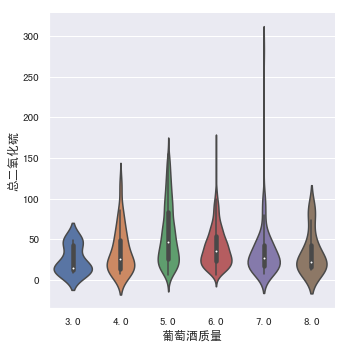

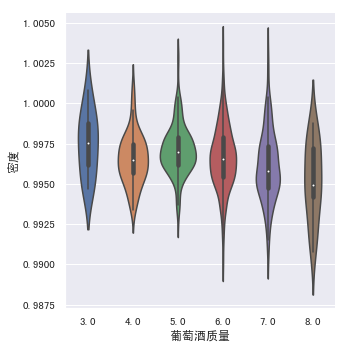

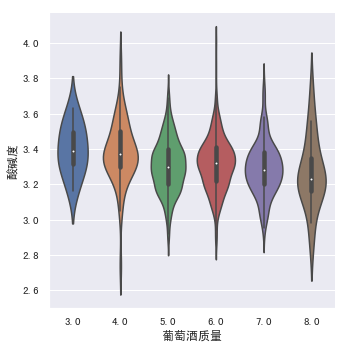

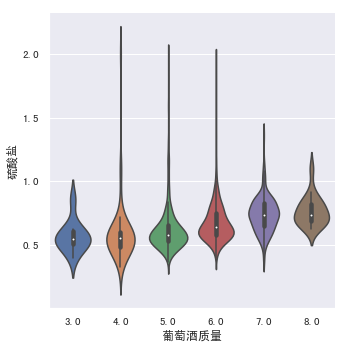

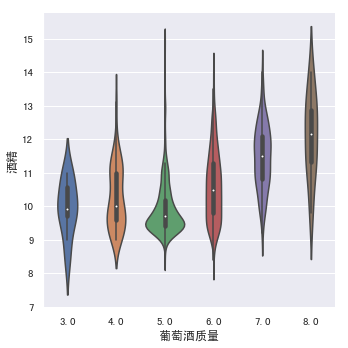

In [10]:
for i in cn_wine.columns[:-1]:
    sns.catplot(x='葡萄酒质量', y=i, kind='violin', data=cn_wine)


高品质葡萄酒与低品质葡萄酒在固定酸，残留糖，游离二氧化硫，总二氧化硫，ph值上的含量并没有什么区别
高品质葡萄酒的游离性酸的含量更集中且偏少，相对于低品质葡萄酒来说
高品质葡萄酒普遍含有更多一些的柠檬酸
高品质葡萄酒的氯化物含量与其他品质葡萄酒基本持平，但它的分布非常的集中
高品质葡萄酒的密度会稍微小一些，但硫酸盐的含量会更高一些
高品质葡萄酒的酒精含量明显比其他品质葡萄酒高


## 4. 预测红葡萄酒的品质

- 使用线性模型预测

基于sklearn库使用线性模型linear_model预测红葡萄酒的品质.

线性模型:$y = a▪x + b$ ,其中$a$表示系数，$b$表示截距.

In [11]:
# 导入相关包
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# 划分特征和标签
X = wine[['fixed_acid', 'volatile_acid', 'citric_acid', 'residual_suger', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
               'density', 'ph', 'sulphates','alcohol']].values
Y = wine['quality'].values

# 划分训练集和测试集
train_X , test_X, train_Y ,test_Y = train_test_split(X, Y, test_size=0.2,random_state=0)

# 定义模型
regr = linear_model.LinearRegression()
# 训练模型
result = regr.fit(train_X, train_Y)

# 打印结果
print('截距Intercept: \n', regr.intercept_)
print('系数Coefficients: \n', regr.coef_)


截距Intercept: 
 34.99871062872058
系数Coefficients: 
 [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


- 检验模型

In [12]:
# 导入相关包
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# 定义 OLS 模型
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print("R方： ",est2.rsquared)
print("调整R方： ",est2.rsquared_adj)


R方：  0.36055170303868855
调整R方：  0.35611948421917095


发现R方和调整R方均为0.36左右，意味着自变量仅解释了目标变量中36%的变化，可见线性模型并不能很好的用来表现葡萄酒数据变量之间的关系.

- 将quality>5的样本定义为品质好的葡萄酒，即标签为 "good" ，否则为 "not"

In [13]:
train_Y,test_Y = list(train_Y), list(test_Y)
for i in range(len(train_Y)):
    train_Y[i] = "good" if train_Y[i]>5 else "not"
for i in range(len(test_Y)):
    test_Y[i] = "good" if test_Y[i]>5 else "not"


- 导入梯度提升决策树模型开始训练，并在测试集上验证

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=10)
clf.fit(train_X, train_Y)
print(clf.score(test_X, test_Y))


0.80625


算出knn模型对测试集的准确性为80.3%左右， 比先前用的线性模型要准确很多。

- 接下来用得到的梯度提升决策树模型去预测测试集并输出结果：

In [15]:
y_test = clf.predict(test_X)
# 打印前十个预测结果
print(y_test[:10])


['not' 'not' 'good' 'not' 'not' 'good' 'not' 'good' 'not' 'not']



## 5. 思考，如何进一步的改进模型？

能不能进一步的改进模型呢？机器学习sklearn包中还有很多表现很好的模型，下面提出了一些可能的改进模型的方案，有兴趣的话可以试一试哦。

1.sklearn.svm 支持向量机

2.sklearn.tree 决策树

3.sklearn.neighbors KNN模型